In [9]:
from skimage.feature import graycomatrix, graycoprops
from skimage.io import imread
from matplotlib import pyplot as plt

In [4]:
datadir='/data/special/web_viewer_verify/'

In [34]:
imgno = '1003'

In [35]:
img = imread(datadir+'/images/img_517_%s.jpg' % imgno)

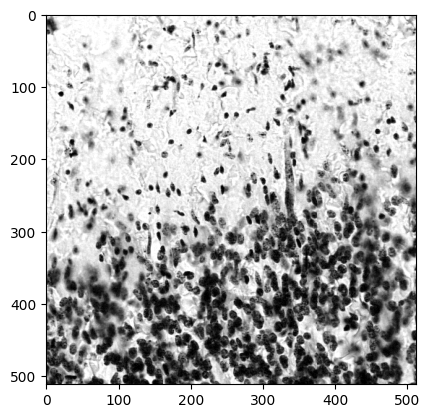

In [54]:
plt.imshow(img[...,1]//8,cmap='gray')

In [48]:
glcm = graycomatrix(img[...,1]//8, distances=[5], angles=[0], levels=32,
                        symmetric=True, normed=True)

In [49]:
fv = {}
for featname in ['contrast','dissimilarity','homogeneity','ASM','energy','correlation']:
    fv[featname]=graycoprops(glcm, featname)[0,0]


In [52]:
fv['imgno']=imgno

In [53]:
list(fv.values())

[68.62714959319527,
 5.704704450197239,
 0.23657976023729518,
 0.005651374717078333,
 0.07517562581767001,
 0.6329084329842142,
 '1003']

# loop

In [57]:
import os
import pandas as pd
from tqdm import tqdm

imglist = [x[:-4] for x in os.listdir(datadir+'/annotated/')]

data = []
for imgno in tqdm(imglist):
    img = imread(datadir+'/images/img_517_%s.jpg' % imgno)
    glcm = graycomatrix(img[...,1]//8, distances=[5], angles=[0], levels=32,
                        symmetric=True, normed=True)
    fv = {'imgno':imgno}
    for featname in ['contrast','dissimilarity','homogeneity','ASM','energy','correlation']:
        fv[featname]=graycoprops(glcm, featname)[0,0]

    data.append(fv)
pd.DataFrame(data).to_csv('features.csv',index=False)
    

100%|██████████| 3049/3049 [01:17<00:00, 39.13it/s]
